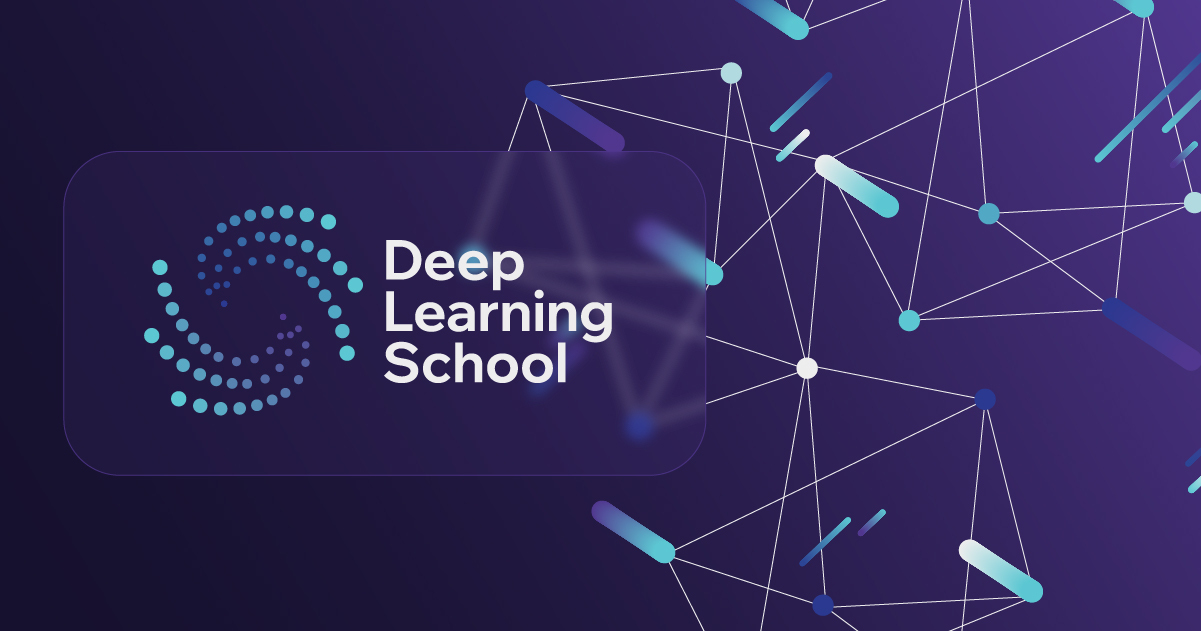

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir /content/project

In [ ]:
!mv /content/hw_1_game_of_thrones.ipynb /content/project/
!mv /content/sample_data /content/project/

mv: cannot stat '/content/hw_1_game_of_thrones.ipynb': No such file or directory


<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

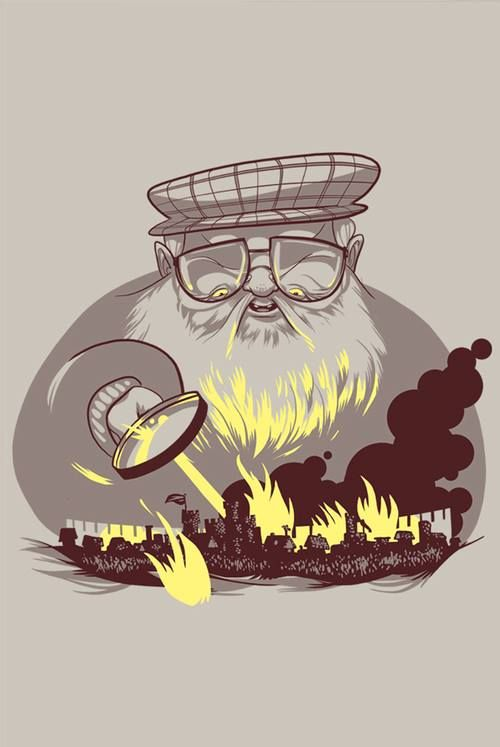

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 75.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 78.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [61]:
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
test_df = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [62]:
df.loc[69]

,69
name,Racallio Ryndoon
title,NaN
male,1
culture,Tyroshi
dateOfBirth,NaN
mother,NaN
father,NaN
heir,NaN
house,Kingdom of the Three Daughters
spouse,NaN


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


<Axes: ylabel='S.No'>

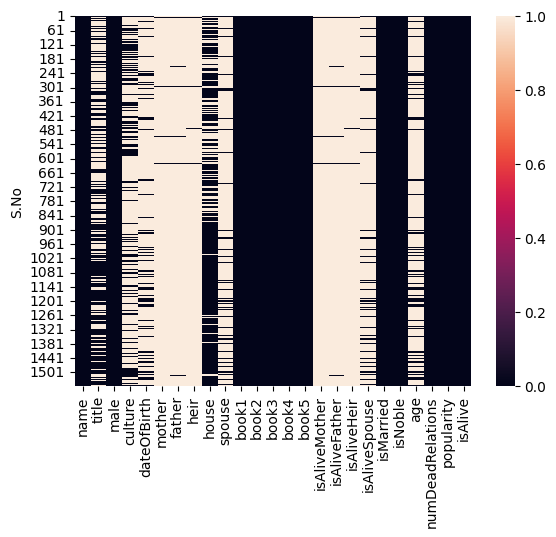

In [63]:


print(df.isnull().sum())
sns.heatmap(df.isnull())

In [64]:
print(df.shape)

(1557, 25)


In [65]:
nan = df.isnull().sum() / len(df) * 100
print(nan)
print(type(nan))

name                 0.000000
title               53.949904
male                 0.000000
culture             68.657675
dateOfBirth         82.080925
mother              98.843931
father              98.587026
heir                98.651252
house               24.470135
spouse              87.154785
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother       98.843931
isAliveFather       98.587026
isAliveHeir         98.651252
isAliveSpouse       87.154785
isMarried            0.000000
isNoble              0.000000
age                 82.080925
numDeadRelations     0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64
<class 'pandas.core.series.Series'>


In [66]:
nan_counts = df.isna().sum()
columns_to_delete = nan_counts[nan_counts > 1300].index.tolist()

df = df.drop(columns=columns_to_delete)

test_df=test_df.drop(columns=columns_to_delete)

In [67]:
df['age'] = df['age'].fillna(df['age'].mean())
df['dateOfBirth'] = df['dateOfBirth'].fillna(df['dateOfBirth'].median())
df['title'] = df['title'].fillna(df['title'].mode()[0])
df['culture'] = df['culture'].fillna(df['culture'].mode()[0])
df['house'] = df['house'].fillna(df['house'].mode()[0])

test_df['age'] = test_df['age'].fillna(test_df['age'].mean())
test_df['dateOfBirth'] = test_df['dateOfBirth'].fillna(test_df['dateOfBirth'].median())
test_df['title'] = test_df['title'].fillna(test_df['title'].mode()[0])
test_df['culture'] = test_df['culture'].fillna(test_df['culture'].mode()[0])
test_df['house'] = test_df['house'].fillna(test_df['house'].mode()[0])

In [68]:
df.head()

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,House Frey,0,0,0,0,0,0,0,35.290323,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.000000,1,0.896321,1
3,Addison Hill,Ser,1,Northmen,272.0,House Swyft,0,0,0,1,0,0,1,35.290323,0,0.267559,1
4,Aemma Arryn,Queen,0,Northmen,82.0,House Arryn,0,0,0,0,0,1,1,23.000000,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.000000,0,0.043478,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [69]:
df['isPopular'] = (df['popularity'] >= 0.5).astype(int)
df=df.drop(columns=['popularity'])


df['boolDeadRelations'] = df['numDeadRelations'] > 0
df['boolDeadRelations'] = df['boolDeadRelations'].astype(int)
df = df.drop(columns='numDeadRelations')


test_df['isPopular'] = (test_df['popularity'] >= 0.5).astype(int)
test_df=test_df.drop(columns=['popularity'])


test_df['boolDeadRelations'] = test_df['numDeadRelations'] > 0
test_df['boolDeadRelations'] = test_df['boolDeadRelations'].astype(int)
test_df = test_df.drop(columns='numDeadRelations')


In [70]:
nan = df.isnull().sum() / len(df) * 100
print(nan)
print(type(nan))

name                 0.0
title                0.0
male                 0.0
culture              0.0
dateOfBirth          0.0
house                0.0
book1                0.0
book2                0.0
book3                0.0
book4                0.0
book5                0.0
isMarried            0.0
isNoble              0.0
age                  0.0
isAlive              0.0
isPopular            0.0
boolDeadRelations    0.0
dtype: float64
<class 'pandas.core.series.Series'>


In [71]:
df.head(10)

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,House Frey,0,0,0,0,0,0,0,35.290323,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.000000,1,1,1
3,Addison Hill,Ser,1,Northmen,272.0,House Swyft,0,0,0,1,0,0,1,35.290323,1,0,0
4,Aemma Arryn,Queen,0,Northmen,82.0,House Arryn,0,0,0,0,0,1,1,23.000000,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.000000,1,0,0
6,Tommen Baratheon,Ser,1,Northmen,272.0,House Frey,0,0,0,0,0,0,0,35.290323,1,1,1
7,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,House Targaryen,0,0,0,0,0,1,1,26.000000,0,0,0
8,Viserys I Targaryen,Ser,1,Northmen,272.0,House Frey,0,0,0,0,0,0,0,35.290323,0,1,1
9,Wilbert,Ser,1,Northmen,272.0,House Frey,0,0,1,0,0,0,1,35.290323,0,0,0


In [72]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [73]:
# Создаем обратный словарь для замены
culture_mapping = {}
for main_culture, variants in cult.items():
    for variant in variants:
        culture_mapping[variant.strip().lower()] = main_culture

# Функция для замены культуры
def unify_culture(culture):
    if pd.isna(culture):
        return culture  # Возвращаем NaN без изменений
    # Приводим к нижнему регистру и удаляем лишние пробелы
    culture = str(culture).strip().lower()
    # Ищем совпадение в словаре
    return culture_mapping.get(culture, 'Other')  # 'Other' для неизвестных культур

# Применяем функцию к столбцу culture
df['culture'] = df['culture'].apply(unify_culture)
test_df['culture'] = test_df['culture'].apply(unify_culture)  # Если есть test_df

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [74]:
df.drop(columns=['house'], inplace = True)
df.drop(columns=['title'], inplace = True)

In [75]:
df.head()

,name,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,Northmen,272.0,0,0,0,0,0,0,0,35.290323,0,1,1
2,Walder Frey,1,Other,208.0,1,1,1,1,1,1,1,97.000000,1,1,1
3,Addison Hill,1,Northmen,272.0,0,0,0,1,0,0,1,35.290323,1,0,0
4,Aemma Arryn,0,Northmen,82.0,0,0,0,0,0,1,1,23.000000,0,0,0
5,Sylva Santagar,0,Dornish,276.0,0,0,0,1,0,1,1,29.000000,1,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [76]:
df['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [77]:
df.drop(columns=['name'], inplace=True)
df = pd.get_dummies(df, columns=['culture'], prefix='Culture')
df = df.astype(int)
df.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,Culture_Myrish,Culture_Northmen,Culture_Norvoshi,Culture_Other,Culture_Qartheen,Culture_Reach,Culture_Stormlander,Culture_Summer Islands,Culture_Westermen,Culture_Westerosi
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272,0,0,0,0,0,0,0,35,...,0,1,0,0,0,0,0,0,0,0
2,1,208,1,1,1,1,1,1,1,97,...,0,0,0,1,0,0,0,0,0,0
3,1,272,0,0,0,1,0,0,1,35,...,0,1,0,0,0,0,0,0,0,0
4,0,82,0,0,0,0,0,1,1,23,...,0,1,0,0,0,0,0,0,0,0
5,0,276,0,0,0,1,0,1,1,29,...,0,0,0,0,0,0,0,0,0,0


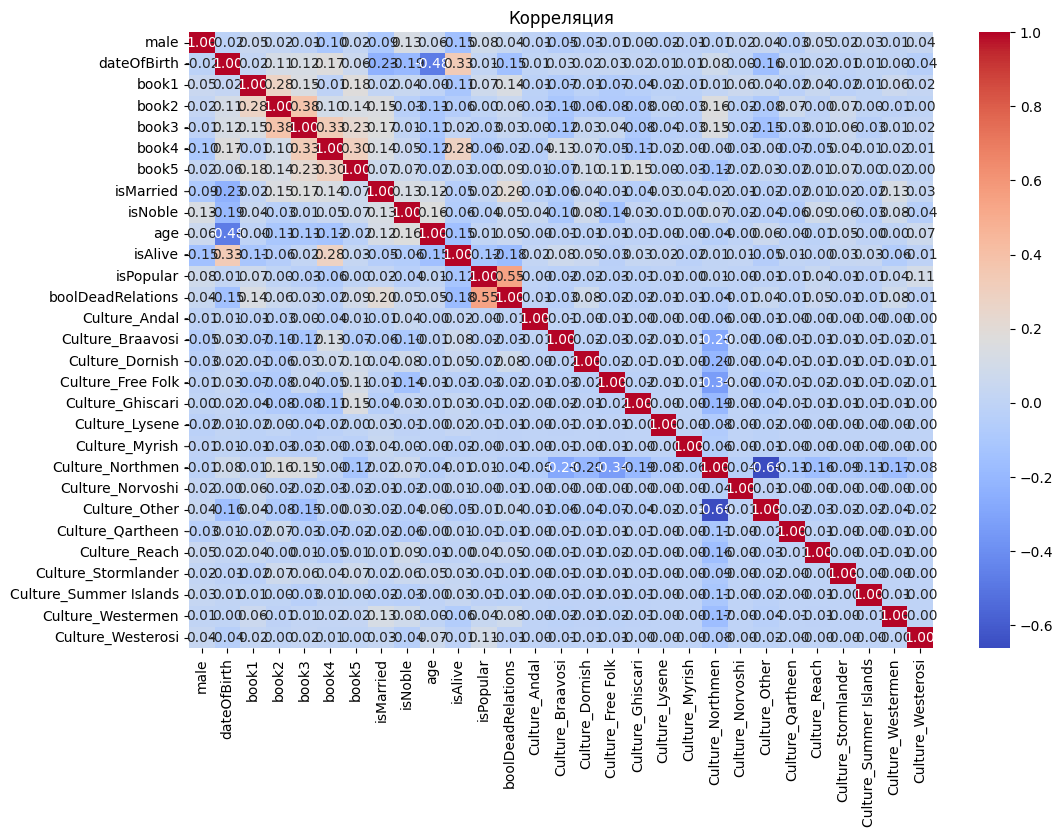

In [78]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляция")
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [79]:
X = df.drop(columns=['isAlive'])

y = df['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [82]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Process": GaussianProcessClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Модель: {name}")
    print(f"Пример предсказаний: {y_pred[:5]}")
    print(f"Точность (accuracy): {accuracy:.4f}\n{'-'*50}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель: Logistic Regression
Пример предсказаний: [1 1 1 1 1]
Точность (accuracy): 0.7949
--------------------------------------------------
Модель: Random Forest
Пример предсказаний: [1 1 1 1 1]
Точность (accuracy): 0.7788
--------------------------------------------------
Модель: AdaBoost
Пример предсказаний: [0 1 1 1 1]
Точность (accuracy): 0.7917
--------------------------------------------------
Модель: Gaussian Process
Пример предсказаний: [1 1 1 1 1]
Точность (accuracy): 0.8173
--------------------------------------------------
Модель: Naive Bayes
Пример предсказаний: [1 0 0 1 0]
Точность (accuracy): 0.3077
--------------------------------------------------
Модель: K-Neighbors
Пример предсказаний: [1 1 0 1 1]
Точность (accuracy): 0.7917
--------------------------------------------------
Модель: SVM
Пример предсказаний: [1 1 1 1 1]
Точность (accuracy): 0.7949
--------------------------------------------------
Модель: Decision Tree
Пример предсказаний: [1 1 1 1 1]
Точность (accurac

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)